* Test the method to combine files by using RecombingSubdomainCODAR.ipynb.

In [26]:
import numpy as np
import netCDF4 as nc
from salishsea_tools import (nc_tools,viz_tools,tidetools,geo_tools)
import datetime, os
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 2.5})

In [2]:
grid6 = nc.Dataset('/ocean/jieliu/research/meopar/river-treatment/bathy_meter_SalishSea6.nc')
X = grid6.variables['nav_lon'][380:510,240:397]
Y = grid6.variables['nav_lat'][380:510,240:397]
bathy = grid6.variables['Bathymetry'][380:510,240:397]

In [3]:
## mask
mesh = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/oct8_101e061e05/mesh_mask.nc')
tmask = mesh.variables['tmask'][0,:,380:510,240:397]
e3t = mesh.variables['e3t'][0,:,380:510,240:397]
e2t = mesh.variables['e2t'][0,380:510,240:397]
e1t = mesh.variables['e1t'][0,380:510,240:397]
np_mask = np.abs(1-tmask) 

In [16]:
## load salinity into a dict
paths = 'oct8_101e061e05Subdomain'
base='/data/jieliu/MEOPAR/river-treatment/'
file_patternTs = 'oct2014*_T.nc'
file_patternUs = 'oct2014*_U.nc'
file_patternVs = 'oct2014*_V.nc'
U = {}; V={}; S={};ssh = {}
pa = paths
pathT = glob(os.path.join(base,pa, file_patternTs))
pathU = glob(os.path.join(base,pa, file_patternUs))
pathV = glob(os.path.join(base,pa, file_patternVs))
print(pathU)
fU = nc.Dataset(pathU[0],'r');
U[pa] = fU.variables['vozocrtx']
fV = nc.Dataset(pathV[0],'r');
V[pa] = fV.variables['vomecrty']
fT = nc.Dataset(pathT[0],'r');
S[pa] = fT.variables['vosaline']
lon = fT.variables['nav_lon'] 
lat = fT.variables['nav_lat']
ssh[pa] = fT.variables['sossheig']
time_counter = fT.variables['time_counter']
depT = fT.variables['deptht']

['/data/jieliu/MEOPAR/river-treatment/oct8_101e061e05Subdomain/oct20148_10sub_U.nc']


(48.9, 49.5)

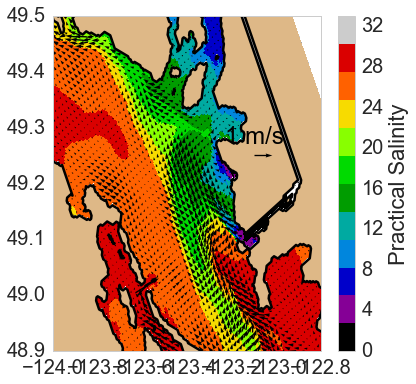

In [21]:
A = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/oct8_101e061e05Subdomain/SalishSea_1h_20141008_20141010_grid_T.nc')
B = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/oct8_101e061e05Subdomain/SalishSea_1h_20141008_20141010_grid_U.nc')
C = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/oct8_101e061e05Subdomain/SalishSea_1h_20141008_20141010_grid_V.nc')
## look at time_counter = -1
fig,ax = plt.subplots(1,1,figsize=(6,6))
colormap = 'spectral'
cm = plt.cm.get_cmap(colormap,12)
theta = np.pi*29/180
run = 'OCT8_10'
gridT = A
gridU = B
gridV = C
t1 =-1 ; st =3
lon = gridT.variables['nav_lon']
lat = gridT.variables['nav_lat']
S[run] =gridT.variables['vosaline'][t1,0]
S[run] = np.ma.masked_values(S[run],0)
u = gridU.variables['vozocrtx'][t1,0]
v = gridV.variables['vomecrty'][t1,0]
U[run],V[run] = viz_tools.unstagger(u,v)
#rotate       
U[run] = U[run]*np.cos(theta) - V[run]*np.sin(theta)
V[run] = U[run]*np.sin(theta) +V[run]*np.cos(theta)
            
mesh=ax.pcolormesh(lon,lat,S[run],vmin =0,vmax = 33,cmap=cm) 
cbar = fig.colorbar(mesh,ax = ax)
cbar.set_label('Practical Salinity')
quiver = ax.quiver(lon[1::st,1::st], lat[1::st,1::st],U[run][::st, ::st], V[run][::st,::st],\
                       pivot='mid',scale=15,width=0.005, color='black' )
ax.quiverkey(quiver,-123.1,49.25, 1, '1 m/s',coordinates='data', color='black', labelcolor='black')
viz_tools.plot_land_mask(ax,grid6,coords='map',color='burlywood')
viz_tools.plot_coastline(ax, grid6, coords = 'map')
ax.set_xlim([-124.,-122.8])
ax.set_ylim([48.9,49.5])

(48.9, 49.5)

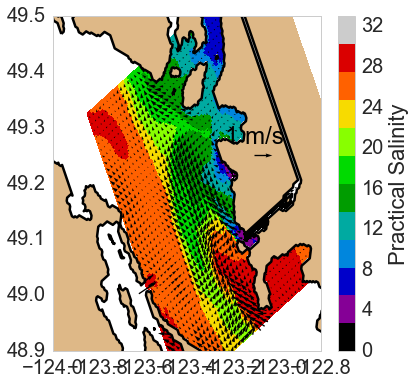

In [22]:
fig,ax = plt.subplots(1,1,figsize=(6,6))
run = 'oct8_101e061e05Subdomain'
lon = fT.variables['nav_lon'] 
lat = fT.variables['nav_lat']
S[run] =fT.variables['vosaline'][t1,0]
S[run] = np.ma.masked_values(S[run],0)
u = fU.variables['vozocrtx'][t1,0]
v = fV.variables['vomecrty'][t1,0]
U[run],V[run] = viz_tools.unstagger(u,v)
#rotate       
U[run] = U[run]*np.cos(theta) - V[run]*np.sin(theta)
V[run] = U[run]*np.sin(theta) +V[run]*np.cos(theta)
            
mesh=ax.pcolormesh(lon,lat,S[run],vmin =0,vmax = 33,cmap=cm) 
cbar = fig.colorbar(mesh,ax = ax)
cbar.set_label('Practical Salinity')
quiver = ax.quiver(lon[1::st,1::st], lat[1::st,1::st],U[run][::st, ::st], V[run][::st,::st],\
                       pivot='mid',scale=15,width=0.005, color='black' )
ax.quiverkey(quiver,-123.1,49.25, 1, '1 m/s',coordinates='data', color='black', labelcolor='black')
viz_tools.plot_land_mask(ax,grid6,coords='map',color='burlywood')
viz_tools.plot_coastline(ax, grid6, coords = 'map')
ax.set_xlim([-124.,-122.8])
ax.set_ylim([48.9,49.5])

(48.9, 49.5)

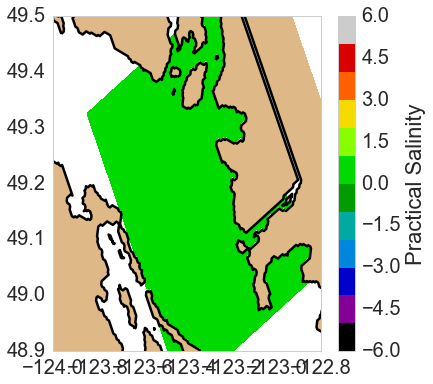

In [25]:
fig,ax = plt.subplots(1,1,figsize=(6,6))
t1 = -1
run = 'oct8_101e061e05Subdomain'
lon = fT.variables['nav_lon'] 
lat = fT.variables['nav_lat']
S[run] =fT.variables['vosaline'][t1,0]
S[run] = np.ma.masked_values(S[run],0)
u = fU.variables['vozocrtx'][t1,0]
v = fV.variables['vomecrty'][t1,0]
U[run],V[run] = viz_tools.unstagger(u,v)
#rotate       
U[run] = U[run]*np.cos(theta) - V[run]*np.sin(theta)
V[run] = U[run]*np.sin(theta) +V[run]*np.cos(theta)
            
mesh=ax.pcolormesh(lon,lat,S[run]-S['OCT8_10'][380:380+130,240:240+157],vmin =-6,vmax = 6,cmap=cm) 
cbar = fig.colorbar(mesh,ax = ax)
cbar.set_label('Practical Salinity')
viz_tools.plot_land_mask(ax,grid6,coords='map',color='burlywood')
viz_tools.plot_coastline(ax, grid6, coords = 'map')
ax.set_xlim([-124.,-122.8])
ax.set_ylim([48.9,49.5])

* This method is correct.